# CSE 4502/5717: Big Data Analytics
## Tutorial A: Scikit-learn and Clustering

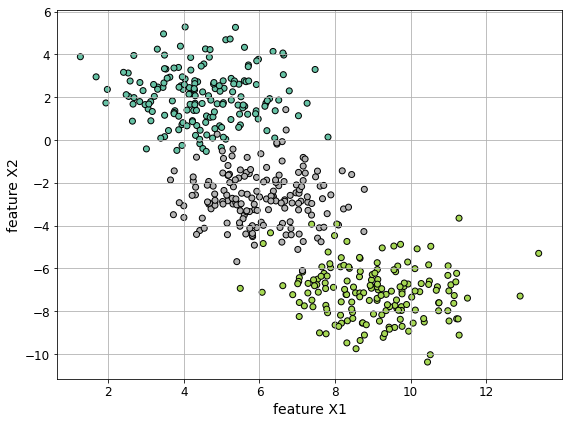

In [1]:
#---------------------------------------------------------------------------------------------
# load the libraries that are required for this project
#---------------------------------------------------------------------------------------------
import numpy as np              # NumPy is for numerical operations
import matplotlib               # MatPlotLib is for making plots & figures
import matplotlib.pyplot as plt # PyPlot is a subset of the library for making MATLAB-style plots

# let us setup the font size
plt.rcParams['axes.labelsize']  = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


#---------------------------------------------------------------------------------------------
# Create a toy dataset of 300 samples with 2 features and 3 clusters
#---------------------------------------------------------------------------------------------
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=1.2, shuffle=True, random_state=36)

# 2-D plot of the data points
plt.figure(1, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set2, edgecolor='black')
plt.xlabel('feature X1')
plt.ylabel('feature X2')
plt.tight_layout()        # make square axes
plt.grid()                # add a grid
plt.show()



## k-Means Clustering

Distortion: 1445.1243371798846


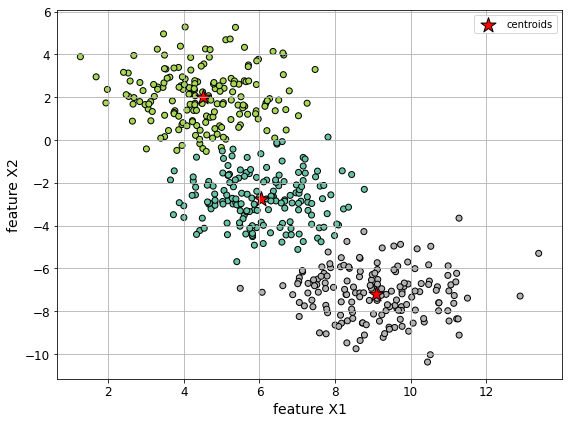

In [2]:
#---------------------------------------------------------------------------------------------
# Let us run the k-means algorithm
#--------------------------------------------------------------------------------------------- 

# Set the number of clusters to 3 (easy case)
NCLUS = 3

# ... 1. Define the k-means classifier
from sklearn.cluster import KMeans
km_clf = KMeans(n_clusters=NCLUS, 
                init='random', # This parameter says how to initialize. It can be "random" or "kmeans++"
                n_init=15, max_iter=300, tol=1e-04, random_state=36)

# ... 2. Apply the k-means classifier to the data
Y_pred = km_clf.fit_predict(X)

# ... 3. Print out the amount of distortion of the estimated clusterization
print('Distortion:', km_clf.inertia_)

# ... 4. Determine the silhouette value for the estimated clusterization
from sklearn.metrics import silhouette_samples
silhouette_vals = silhouette_samples(X, Y_pred, metric='euclidean')

# Let us plot the scattered samples with the estimated centroids
plt.figure(1, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=Y_pred, cmap=plt.cm.Set2, edgecolor='k')
plt.scatter(km_clf.cluster_centers_[:, 0],km_clf.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.xlabel('feature X1')
plt.ylabel('feature X2')
plt.tight_layout()        # make square axes
plt.grid()                # add a grid
plt.show()



While training the model, an expert is required to decide the number of the clusters that should be there. This becomes very difficult as the dimension of the data increases. There are two simple and popular methods of doing this.

Inertia: It is defined as the mean squared distance between each instance and its closest centroid. Logically, as per the definition lower the inertia better the model.

Silhouette Score: This is a better measure to decide the number of clusters to be formulated from the data. It is calculated for each instance and the formula goes like this:

Silhouette Coefficient = (x-y)/ max(x,y)


As per this method  k=2 should be chosen for the number of clusters. This method is better as it makes the decision regarding the optimal number of clusters more meaningful and clear. But this metric is computation expensive as the coefficient is calculated for every instance. Therefore, decision regarding the optimal metric to be chosen for the number of cluster decision is to be made according to the needs of the product.


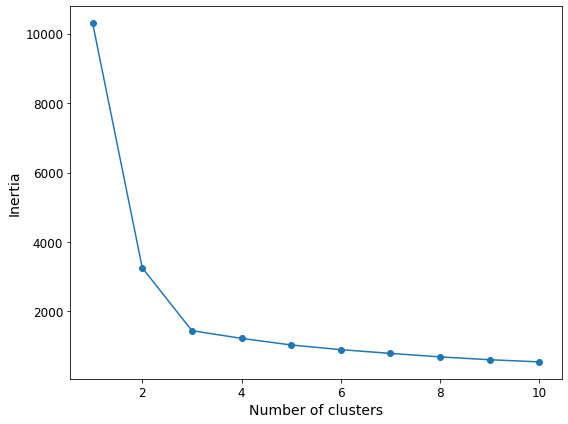

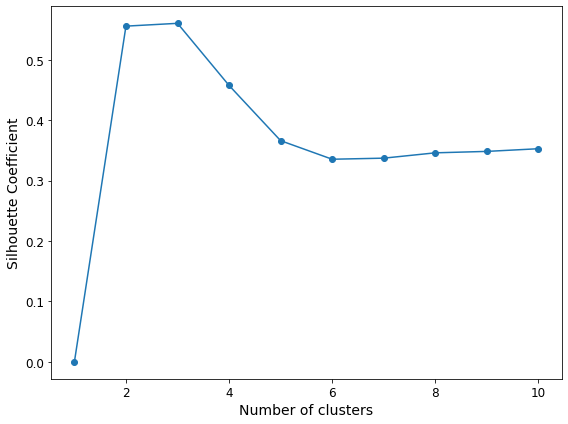

In [3]:
from sklearn.metrics import silhouette_score

# let us now vary the number of clusters and find the best number of clusters
distortions = []
silhouette = [0]


# for each number of clusters in the assigned range...
for NCLUS in range(1, 11):
    km_clf = KMeans(n_clusters = NCLUS, init='random', n_init=15, max_iter=300, tol=1e-04, random_state=36)
    Y_pred = km_clf.fit_predict(X)
    distortions.append(km_clf.inertia_)
    
    # remember: silhouette coefficient can be computed in case of 2+ clusters...
    if (NCLUS>1):
        silhouette.append(silhouette_score(X, Y_pred, metric='euclidean'))

# Let us plot the distortion values versus the number of clusters
plt.figure(1, figsize=(8, 6))
plt.clf()

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

# Let us plot the silhouette coefficient versus the number of clusters
plt.figure(2, figsize=(8, 6))
plt.clf()

plt.plot(range(1, 11), silhouette, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.tight_layout()
plt.show()

## Limitations of k-Means

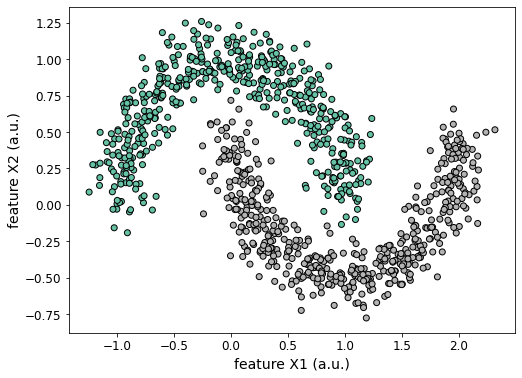

In [4]:
#---------------------------------------------------------------------------------------------
# Load another dataset with non-spherical in-cluster distribution:
#---------------------------------------------------------------------------------------------

# Moons dataset (a set of 2-D points arranged as two adjacent moons)
from sklearn.datasets import make_moons
X2, Y2 = make_moons(n_samples=1000, shuffle=True, noise=0.12, random_state=36)

# 2-D plot of the moon data
plt.figure(1, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X2[:, 0], X2[:, 1], c=Y2, cmap=plt.cm.Set2, edgecolor='black')
plt.xlabel('feature X1 (a.u.)')
plt.ylabel('feature X2 (a.u.)')
plt.show()

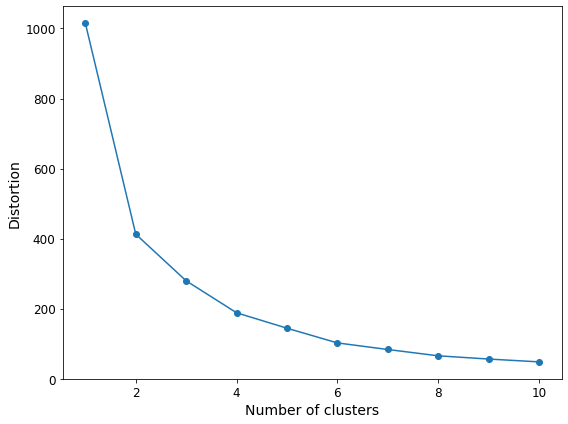

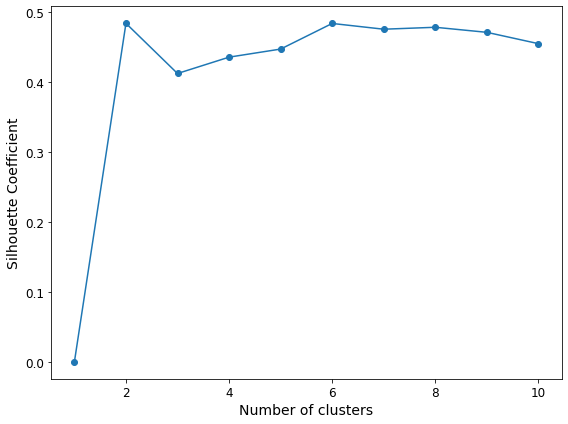

In [5]:
# let us search for the best number of clusters...
distortions = []
silhouette = [0]

# for each number of clusters in the assigned range...
for NCLUS in range(1, 11):
    km_clf2 = KMeans(n_clusters = NCLUS, init='random', n_init=15, max_iter=300, tol=1e-04, random_state=36)
    Y2_pred = km_clf2.fit_predict(X2)
    distortions.append(km_clf2.inertia_)
    
    # remember: silhouette coefficient can be computed in case of 2+ clusters...
    if (NCLUS>1):
        silhouette.append(silhouette_score(X2, Y2_pred, metric='euclidean'))

# Let us plot the distortion values versus the number of clusters
plt.figure(1, figsize=(8, 6))
plt.clf()

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

# Let us plot the silhouette coefficient versus the number of clusters
plt.figure(2, figsize=(8, 6))
plt.clf()

plt.plot(range(1, 11), silhouette, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.tight_layout()
plt.show()

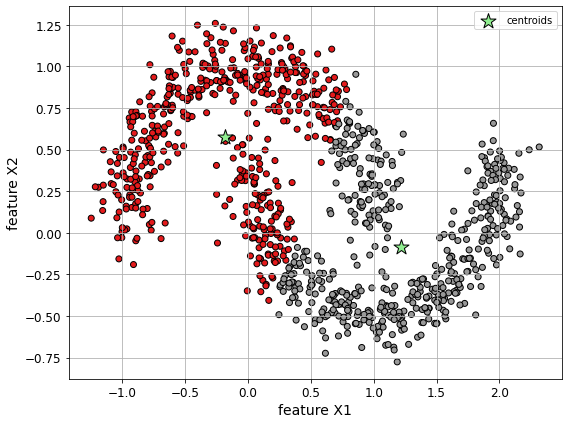

In [6]:
# Let us run the k-Means algorithm with 2 clusters
NCLUS = 2
km_clf2 = KMeans(n_clusters=NCLUS, init='random', n_init=15, max_iter=300, tol=1e-04, random_state=36)
Y2_pred = km_clf2.fit_predict(X2)

# Let us plot the scattered samples with the estimated centroids
plt.figure(1, figsize=(8, 6))
plt.clf()

plt.scatter(X2[:, 0], X2[:, 1], c=Y2_pred, cmap=plt.cm.Set1, edgecolor='k')
plt.scatter(km_clf2.cluster_centers_[:, 0],km_clf2.cluster_centers_[:, 1], s=250, marker='*', c='lightgreen', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.xlabel('feature X1')
plt.ylabel('feature X2')
plt.tight_layout()        # make square axes
plt.grid()                # add a grid
plt.show()

In [7]:
# let us calculate the value of silhouette for the clusters identified via k-Means
silhouette_db = np.mean(silhouette_samples(X2, Y2_pred, metric='euclidean'))
print('Silhouette Value: k-Means: ',silhouette_db)

Silhouette Value: k-Means:  0.48430116176570737


## DBSCAN Algorithm
### Dealing with non-spherical datasets



eps: specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors.

minPoints: the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region.

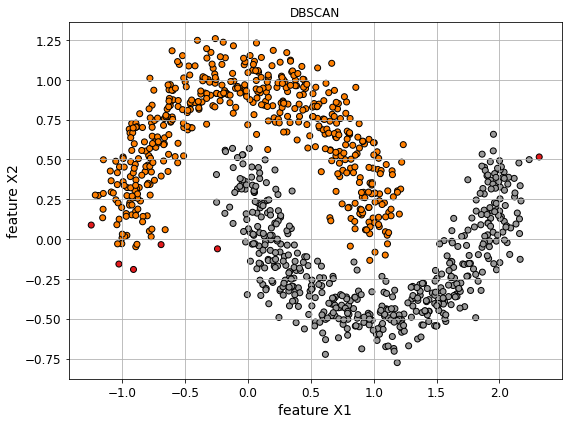

In [8]:
# Density-based Spatial Clustering of Applications with Noise (DBSCAN)
from sklearn.cluster import DBSCAN
db_clf = DBSCAN(eps=0.2, min_samples=25, metric='euclidean')
Y_db = db_clf.fit_predict(X2)

plt.figure(2, figsize=(8, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=Y_db, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('feature X1')
plt.ylabel('feature X2')
plt.title('DBSCAN')
plt.tight_layout()        # make square axes
plt.grid()                # add a grid
plt.show()

In [9]:
# let us calculate the value of silhouette for the clusters identified via DBSCAN
silhouette_db = np.mean(silhouette_samples(X2, Y_db, metric='euclidean'))
print('Silhouette Value: DBSCAN: ',silhouette_db)

Silhouette Value: DBSCAN:  0.24974071406760143
